### Importación del DataSET

In [1]:
import os
import numpy as np
import tensorflow as tf
import cv2
import re
import os
import matplotlib.pyplot as plt


In [2]:
datapath = r"C:\Users\JUANPABLOGASCA\Desktop\Pacientes_CNN\P10\Clases-128"
imgpath = datapath + os.sep 

images = []
directories = []
dircount = []
prevRoot=''
cant=0

print("leyendo imagenes de ",imgpath)

for root, datapath, filenames in os.walk(imgpath):
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            cant=cant+1
            filepath = os.path.join(root, filename)
            image = plt.imread(filepath)
            images.append(image)
            b = "Leyendo..." + str(cant)
            print (b, end="\r")
            if prevRoot !=root:
                print(root, cant)
                prevRoot=root
                directories.append(root)
                dircount.append(cant)
                cant=0

dircount.append(cant)

dircount = dircount[1:]
dircount[0]=dircount[0]+1
print('Directorios leidos:',len(directories))
print("Imagenes en cada directorio", dircount)
print('Suma Total de imagenes en subdirs:',sum(dircount))

leyendo imagenes de  C:\Users\JUANPABLOGASCA\Desktop\Pacientes_CNN\P10\Clases-128\
C:\Users\JUANPABLOGASCA\Desktop\Pacientes_CNN\P10\Clases-128\CLASE_1 1
C:\Users\JUANPABLOGASCA\Desktop\Pacientes_CNN\P10\Clases-128\CLASE_2 1872
C:\Users\JUANPABLOGASCA\Desktop\Pacientes_CNN\P10\Clases-128\CLASE_3 1872
C:\Users\JUANPABLOGASCA\Desktop\Pacientes_CNN\P10\Clases-128\CLASE_4 1872
C:\Users\JUANPABLOGASCA\Desktop\Pacientes_CNN\P10\Clases-128\CLASE_5 1872
C:\Users\JUANPABLOGASCA\Desktop\Pacientes_CNN\P10\Clases-128\CLASE_6 1872
Directorios leidos: 6
Imagenes en cada directorio [1873, 1872, 1872, 1872, 1872, 1871]
Suma Total de imagenes en subdirs: 11232


In [3]:
labels=[]
indice=0
for cantidad in dircount:
    for i in range(cantidad):
        labels.append(indice)   
    indice=indice+1
print("Cantidad etiquetas creadas: ",len(labels))

Cantidad etiquetas creadas:  11232


In [4]:
posturas=[]
indice=0
for directorio in directories:
    name = directorio.split(os.sep)
    print(indice , name[len(name)-1])
    posturas.append(name[len(name)-1])
    indice=indice+1

0 CLASE_1
1 CLASE_2
2 CLASE_3
3 CLASE_4
4 CLASE_5
5 CLASE_6


In [5]:
y = np.array(labels)
X = np.array(images) #convierto de lista a numpy

# Find the unique numbers from the train labels
classes = np.unique(y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  6
Output classes :  [0 1 2 3 4 5]


In [6]:
from sklearn.model_selection import train_test_split

# Test data // for testing at the end after tranning 
train_X,test_X,train_Y,test_Y = train_test_split(X,y,test_size=0.1)
#print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)

# validation data // for testing when tranning 

train_X,val_X,train_Y,val_Y = train_test_split(train_X,train_Y,test_size=0.1)
print('Training data shape : ', train_X.shape, train_Y.shape)
print('validation data shape : ', val_X.shape, val_Y.shape)

Testing data shape :  (1124, 128, 128, 4) (1124,)
Training data shape :  (9097, 128, 128, 4) (9097,)
validation data shape :  (1011, 128, 128, 4) (1011,)


In [7]:
img_x = 128
img_y = 128
img_z = 4
num_classes = 6

batch_size = 32
epochs = 100

# reshape the data into a 4D tensor - (sample_number, x_img_size, y_img_size, num_channels)
# because the MNIST is greyscale, we only have a single channel - RGB colour images would have 3
input_shape = (img_x, img_y, img_z)

# convert the data to the right type
#train_X = train_X.reshape(train_X.shape[0], img_x, img_y, img_z)
#test_X = test_X.reshape(test_X.shape[0], img_x, img_y, img_z)
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
val_X = val_X.astype('float32')

print('train_X shape:', train_X.shape)
print(train_X.shape[0], 'train samples')
print(val_X.shape[0], 'val samples')
print(test_X.shape[0], 'test samples')

# convert class vectors to binary class matrices - this is for use in the
# categorical_crossentropy loss below
#train_Y = tf.keras.utils.to_categorical(train_Y, num_classes)
#test_Y = tf.keras.utils.to_categorical(test_Y, num_classes)


# Guardar el modelo con nombre del tiempo en que se entreno para no sobreescribir los modelos

#NAME ="model_all_to_one_32px-{}".format(int(time.time()))

#NAME = 'all_to_on_300seg'

#tensorboard = TensorBoard(log_dir=r'C:\Users\hpalm\Desktop\Programacion\Proyecto_de_grado\Jupyter\Codigo\logs\p10_2')

train_X shape: (9097, 128, 128, 4)
9097 train samples
1011 val samples
1124 test samples


In [8]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import TensorBoard

In [9]:
# Crear un objeto TensorBoard - ESTO ES NECESARIO QUE ES PARA VISUALIZAR LAS GRAFICAS DE LOS PACIENTES ENTRE TODOS ASÍ QUE GUARDELO POR CADA PACIENTE
tensorboard_callback = TensorBoard(log_dir=r"C:\Users\JUANPABLOGASCA\Desktop\Pacientes_CNN\Tensorboard\Prueba\\128\P10")

In [10]:
custom_early_stopping = EarlyStopping(monitor="loss",patience=3) 


In [11]:
# Definir el modelo 1
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(8, kernel_size=(3, 3), strides = (2,2), padding = 'same' ,activation='relu', input_shape=input_shape),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(40, kernel_size=(3, 3), strides = (2,2),padding = 'same' ,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), strides = (2,2), padding = 'same',activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(56, kernel_size=(3, 3), strides = (2,2), padding = 'same',activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Flatten(),
    #tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])


model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
              metrics=['accuracy'])
model.summary()

model_train = model.fit(train_X,train_Y, batch_size=32, 
          epochs=100, verbose=1, 
          validation_data=(val_X, val_Y),
          callbacks=[tensorboard_callback,custom_early_stopping])

train_score = model.evaluate(train_X, train_Y, verbose=0)
print('Train loss: {}, Train accuracy: {}'.format(train_score[0], train_score[1]))
test_score = model.evaluate(test_X, test_Y, verbose=0)
print('Test loss: {}, Test accuracy: {}'.format(test_score[0], test_score[1]))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 8)         296       
                                                                 
 dropout (Dropout)           (None, 64, 64, 8)         0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 40)        2920      
                                                                 
 dropout_1 (Dropout)         (None, 32, 32, 40)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        23104     
                                                                 
 dropout_2 (Dropout)         (None, 16, 16, 64)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 56)          3

c:\Users\JUANPABLOGASCA\anaconda3\envs\machinelearning\lib\site-packages\keras\backend.py:5585: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


285/285 [==============================] - 28s 89ms/step - loss: 1.3739 - accuracy: 0.3976 - val_loss: 1.2105 - val_accuracy: 0.4599
Epoch 2/100
285/285 [==============================] - 28s 97ms/step - loss: 1.1749 - accuracy: 0.4982 - val_loss: 1.1329 - val_accuracy: 0.5035
Epoch 3/100
285/285 [==============================] - 26s 90ms/step - loss: 1.0620 - accuracy: 0.5613 - val_loss: 0.9985 - val_accuracy: 0.5964
Epoch 4/100
285/285 [==============================] - 25s 88ms/step - loss: 0.9721 - accuracy: 0.6082 - val_loss: 0.8986 - val_accuracy: 0.6479
Epoch 5/100
285/285 [==============================] - 25s 87ms/step - loss: 0.8816 - accuracy: 0.6508 - val_loss: 0.8296 - val_accuracy: 0.6588
Epoch 6/100
285/285 [==============================] - 26s 90ms/step - loss: 0.8075 - accuracy: 0.6850 - val_loss: 0.7621 - val_accuracy: 0.7171
Epoch 7/100
285/285 [==============================] - 25s 88ms/step - loss: 0.7495 - accuracy: 0.7100 - val_loss: 0.7574 - val_accuracy: 0.72

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 8)         296       
                                                                 
 dropout (Dropout)           (None, 64, 64, 8)         0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 40)        2920      
                                                                 
 dropout_1 (Dropout)         (None, 32, 32, 40)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        23104     
                                                                 
 dropout_2 (Dropout)         (None, 16, 16, 64)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 56)          3

### VALIDATION

In [13]:
from matplotlib import pyplot as plt
def visualizacion_resultados(model):
  
    fig, ax = plt.subplots(1,2)
    acc = model.history['accuracy']
    loss = model.history['loss']
    val_acc = model.history['val_accuracy']
    val_loss = model.history['val_loss']
    epochs  = range(len(acc))
    fig.set_size_inches(16,9)

    ax[0].plot(epochs,acc,'ko-',label = 'Train Accuracy')
    ax[0].plot(epochs,val_acc,'bo-',label = 'Validation Acurracy')
    ax[0].set_title('Training & Validation Accuracy')
    ax[0].legend()
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Accuracy')
    #plt.savefig(r"C:\Users\JUANPABLOGASCA\Desktop\Pacientes_CNN\Validation\P06_S1_32_ACC.png",bbox_inches = 'tight')


    ax[1].plot(epochs,loss,'ko-',label = 'Train Loss')
    ax[1].plot(epochs,val_loss,'bo-',label = 'Validation Loss')
    ax[1].set_title('Training & Validation Loss')
    ax[1].legend()
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('Loss')
    plt.savefig(r"C:\Users\JUANPABLOGASCA\Desktop\Pacientes_CNN\Validation\\128_4\P10_S1_128_ACC_LOSS.png",bbox_inches = 'tight')
    plt.show()


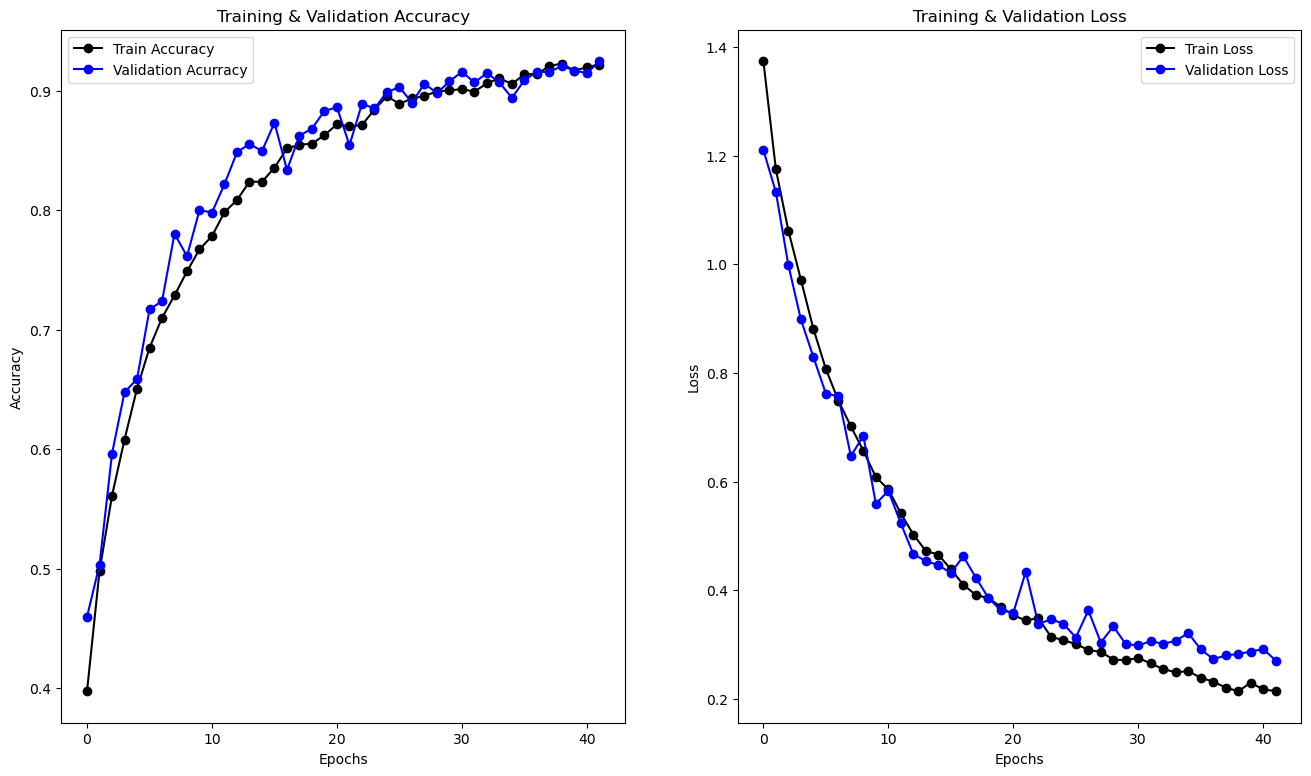

In [14]:
visualizacion_resultados(model_train)

### SAVE H5

In [15]:
if os.path.isfile(r"C:\Users\JUANPABLOGASCA\Desktop\Pacientes_CNN\H5\\128_4\P10_S1_128_CNN.h5") is False:
    model.save(r"C:\Users\JUANPABLOGASCA\Desktop\Pacientes_CNN\H5\\128_4\P10_S1_128_CNN.h5")

### CNN ARQUITECTURE

In [24]:
import visualkeras
from PIL import ImageFont
from tensorflow.keras import layers
from collections import defaultdict
from PIL import Image

# Definir la fuente
font = ImageFont.truetype("arial.ttf", 15)

color_map = defaultdict(dict)
color_map[layers.Conv2D]['fill'] = '#00f5d4'
color_map[layers.MaxPooling2D]['fill'] = '#8338ec'
color_map[layers.Dense]['fill'] = '#fb5607'
color_map[layers.Flatten]['fill'] = '#ffbe0b'

img = visualkeras.layered_view(model, legend=True, font=font,color_map=color_map)
#img.save(r"C:\Users\JUANPABLOGASCA\Desktop\Pacientes_CNN\Arquitectura - CNN\CNN_3.png", "PNG")


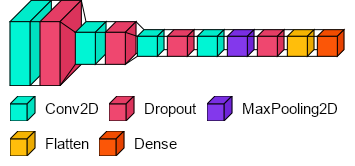

In [25]:
img

### CONFUSION MATRIX

36/36 [==============================] - 1s 14ms/step
Confusion Matrix
[[131   6   4   3   6   0]
 [  5 188   5   2   2   0]
 [  7  11 174   5   3   0]
 [  5   3   3 169  13   0]
 [  4   0   1   6 183   0]
 [  0   0   0   0   0 185]]


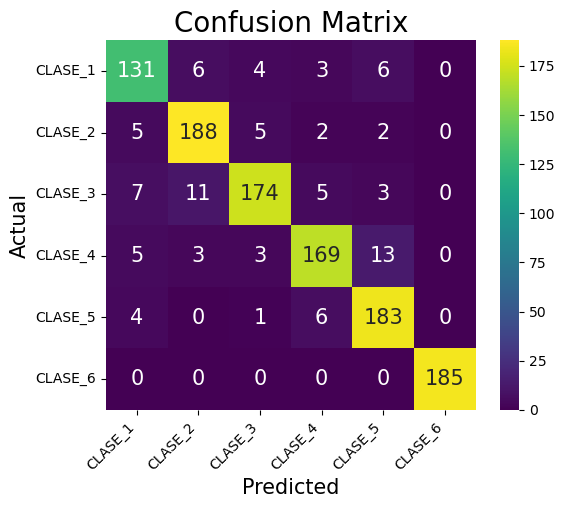

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sn

#convert tests labels in single-digits instead of one-hot encoding
y_test_arg = np.array(test_Y, dtype=int)

Y_pred = np.argmax(model.predict(test_X),axis=1)
print('Confusion Matrix')
print(confusion_matrix(y_test_arg, Y_pred))

#Normalizado
#np.round(cm/np.sum(cm,axis =1).reshape(-1,1),2)

#Confusion matrix
cm = confusion_matrix(y_test_arg, Y_pred)

labels=["CLASE_1","CLASE_2","CLASE_3","CLASE_4","CLASE_5","CLASE_6"] 
#cm = np.round(cm/np.sum(cm,axis =1).reshape(-1,1),1)
df_cm = pd.DataFrame(cm, index=labels, columns=labels)
ax = plt.axes()
ax = sn.heatmap(df_cm, annot=True, annot_kws={"size": 15}, square=True, cbar=True, cmap="viridis", fmt='g')
ax.set_title('Confusion Matrix', fontsize =20)
ax.set_ylim(0, 6) #this manually corrects the cutoff issue in sns.heatmap found in matplotlib ver 3.1.1
plt.xlabel("Predicted",fontsize =15) 
plt.ylabel("Actual",fontsize =15) 
ax.invert_yaxis() #optional
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.set_yticklabels(labels, rotation=0, ha='right')
plt.savefig(r"C:\Users\JUANPABLOGASCA\Desktop\Pacientes_CNN\Confusion Matrix\Normal\\128_4\P10_S1_128.png", bbox_inches = 'tight')
plt.show()

### CONFUSION MATRIX

36/36 [==============================] - 1s 17ms/step
Confusion Matrix
[[131   6   4   3   6   0]
 [  5 188   5   2   2   0]
 [  7  11 174   5   3   0]
 [  5   3   3 169  13   0]
 [  4   0   1   6 183   0]
 [  0   0   0   0   0 185]]


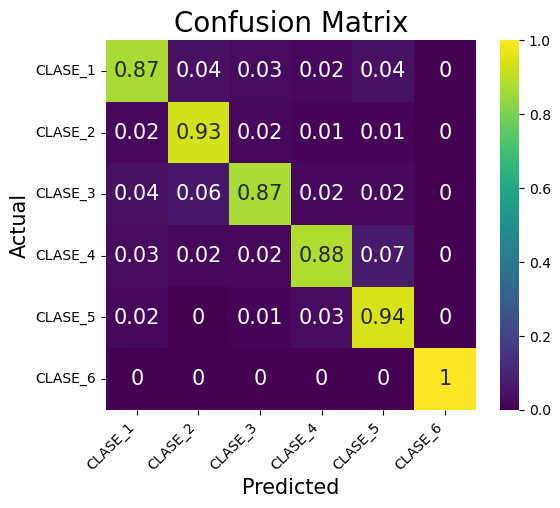

In [17]:
import seaborn as sn
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix

#convert tests labels in single-digits instead of one-hot encoding
y_test_arg = np.array(test_Y, dtype=int)
Y_pred = np.argmax(model.predict(test_X),axis=1)
print('Confusion Matrix')
print(confusion_matrix(y_test_arg, Y_pred))

#Normalizado
#np.round(cm/np.sum(cm,axis =1).reshape(-1,1),2)

#Confusion matrix
cm = confusion_matrix(y_test_arg, Y_pred)

labels=["CLASE_1","CLASE_2","CLASE_3","CLASE_4","CLASE_5","CLASE_6"] 
cm = np.round(cm/np.sum(cm,axis =1).reshape(-1,1),2)
df_cm = pd.DataFrame(cm, labels, labels)
ax = plt.axes()
ax = sn.heatmap(df_cm, annot=True, annot_kws={"size": 15}, square=True, cbar=True, cmap="viridis", fmt='g')
ax.set_title('Confusion Matrix', fontsize =20)
ax.set_ylim(0, 6) #this manually corrects the cutoff issue in sns.heatmap found in matplotlib ver 3.1.1
plt.xlabel("Predicted",fontsize =15) 
plt.ylabel("Actual",fontsize =15) 
ax.invert_yaxis() #optional
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.set_yticklabels(labels, rotation=0, ha='right')
plt.savefig(r"C:\Users\JUANPABLOGASCA\Desktop\Pacientes_CNN\Confusion Matrix\Normalize\\128_4\P10_S1_128.png",transparent = False,bbox_inches = 'tight')
plt.show()

### METRICS 

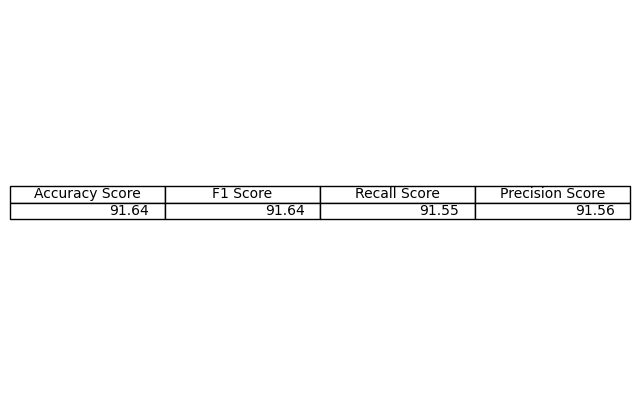

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test_arg, Y_pred)
f1 = f1_score(y_test_arg, Y_pred, average='weighted')
recall = recall_score(y_test_arg, Y_pred, average='macro')
precision = precision_score(y_test_arg, Y_pred, average='macro')

metrics_dict = {'Accuracy Score': [round(accuracy*100,2)], 'F1 Score': [round(accuracy*100,2)], 'Recall Score': [round(recall*100,2)], 'Precision Score': [round(precision*100,2)]}
df_metrics = pd.DataFrame.from_dict(metrics_dict)

# guardar dataframe como png
fig, ax = plt.subplots(figsize=(8,5))
ax.axis('off')
ax.axis('tight')
ax.table(cellText=df_metrics.values,colLabels=df_metrics.columns,loc='center')
plt.savefig(r"C:\Users\JUANPABLOGASCA\Desktop\Pacientes_CNN\Metrics\Metrics General\\128_4\P10.png")


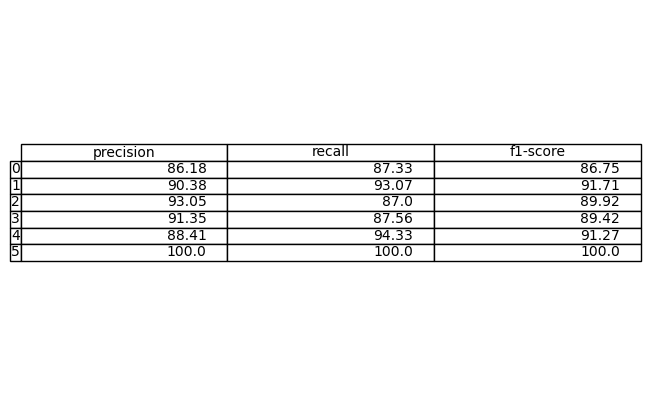

In [19]:
from sklearn import metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Obtener el reporte de clasificación
report = metrics.classification_report(y_test_arg,Y_pred, digits = 4, output_dict=True)
df = pd.DataFrame(report).transpose()

# Eliminar la última fila ('accuracy') ya que no es necesaria
#df = df.iloc[:-1,:]
class_metrics = df.loc[['0', '1', '2', '3', '4', '5'], ['precision', 'recall', 'f1-score']]

# Guardar la tabla como PNG
fig, ax = plt.subplots(figsize=(8,5))
ax.axis('off')
ax.axis('tight')
ax.table(cellText=np.round(class_metrics.values*100,2),colLabels=class_metrics.columns,rowLabels=class_metrics.index,loc='center')
plt.savefig(r"C:\Users\JUANPABLOGASCA\Desktop\Pacientes_CNN\Metrics\Metrics Class\\128_4\P10.png")

